<a href="https://colab.research.google.com/github/andre-diass/my-notes/blob/main/Dados_Inteligencia_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÃO DAS LIBS E PREPARAÇÃO DOS DADOS

In [2]:
!pip install minisom;

import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;

from minisom import MiniSom;
from sklearn.cluster import KMeans;
from sklearn.preprocessing import MinMaxScaler;
from google.colab import drive;
from matplotlib.patheffects import withStroke;
from sklearn.metrics import silhouette_score

drive.mount('/content/drive');

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=390780b20be49f31b1ad3076892716879b466a5549e2383683a5f445d426eb7f
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom
Mounted at /content/drive


## Preparação inicial dos dados

In [3]:
# Colunas anônimas
anon_cols = ['CODIGO CONTRIBUINTE',
			 'RAZAO SOCIAL',
			 'RADICAL CNPJ CONTRIBUINTE',
			 'CPF/CNPJ',
			 'CPF SOCIO',
			 'NOME SOCIO',
			 'CPF CONTADOR',
			 'NOME CONTADOR',
			 'PROCESSO',
			 'NUM. FORMULARIO',
			 'CEP',
			 'BAIRRO',
			 'LOGRADOURO',
			 'NUMERO',
			 'MUNICIPIO',
			 'UF']
#Colunas de datas
date_cols = ['DATA DE AJUIZAMENTO',
			 'DATA DE CANCELAMENTO',
			 'DATA DE LIQUIDACAO',
			 'DATA DE REGISTRO',
			 'DATA DE INSCRICAO',
			 'DATA MUDANCA FASE CBA PDA',
			 'DATA DE ESGOTAMENTO PARCELAMENTO']

In [5]:
#Função que convertendo tudo para float
def convert_to_float(value):
	try:
		# Tenta converter o valor para float diretamente
		return float(value)
	except ValueError:
		# Se não for possível converter diretamente, substitui vírgula por ponto e tenta novamente
		return float(value.replace(",", "."))

In [6]:
df = pd.read_csv('/content/drive/Shareddrives/IA grupo 7/DadosAnonimizadosNovoV1.csv', parse_dates=date_cols, dayfirst=True)
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/IA grupo 7/DadosAnonimizadosNovoV1.csv'

In [4]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.tail()

,CODIGO CONTRIBUINTE,RAZAO SOCIAL,RADICAL CNPJ CONTRIBUINTE,CPF/CNPJ,CEP,BAIRRO,LOGRADOURO,NUMERO,MUNICIPIO,UF,...,PARCELAS PAGAS,SITUACAO PARCELAMENTO,TIPO PARCELAMENTO,DATA DE ESGOTAMENTO PARCELAMENTO,SOB DEFESA ?,FASE COBRANCA,ESFERA COBRANCA,ANO PERIODO FISCAL EMPRESA,VALOR ARRECADADO ANO,VALOR FATURADO ANO
1048560,gAAAAABkzX-gA7P8SmeLJ6HMVYV9fE2t1vso4aZYkx7k1J...,gAAAAABkzY8YTaiDhiO-8Ti0zMRXcJ8INeZQWrwI3Aj_Vn...,gAAAAABkzZ5BiiCi83ckOYsdpxF-boHin33tqDCRM0DbhH...,gAAAAABkza7O5vMV3vRO2vl9QLF6ohjCZnNxS58DXg-Y2o...,gAAAAABkziJjTiUrtW-VNJuDfMkKb2fc1xkTAda6p48w_E...,gAAAAABkziR-lK481YD1UlvgNT0m5T0znm9Mjt_FyWaYVQ...,gAAAAABkziW3SlE38MLmpXL_jrccJwQdEZaGEXcWewMzOK...,gAAAAABkziiP7_RkcvzRMn4D2FZf2y1GBlAWW37MQgzk10...,gAAAAABkzil68Mr3sjh3G0fBqVWv0DsFgXsPuBAiZl7uOF...,gAAAAABkzimEjBL3MqMIw5kLMrdqdZzeEm43FyBRtAwYjt...,...,-,-,-,-,Não,ADMINISTRATIVA,PRE-DIV. ATIVA,-,0,0
1048561,gAAAAABkzX-gA7P8SmeLJ6HMVYV9fE2t1vso4aZYkx7k1J...,gAAAAABkzY8YTaiDhiO-8Ti0zMRXcJ8INeZQWrwI3Aj_Vn...,gAAAAABkzZ5BiiCi83ckOYsdpxF-boHin33tqDCRM0DbhH...,gAAAAABkza7O5vMV3vRO2vl9QLF6ohjCZnNxS58DXg-Y2o...,gAAAAABkziJjTiUrtW-VNJuDfMkKb2fc1xkTAda6p48w_E...,gAAAAABkziR-lK481YD1UlvgNT0m5T0znm9Mjt_FyWaYVQ...,gAAAAABkziW3SlE38MLmpXL_jrccJwQdEZaGEXcWewMzOK...,gAAAAABkziiP7_RkcvzRMn4D2FZf2y1GBlAWW37MQgzk10...,gAAAAABkzil68Mr3sjh3G0fBqVWv0DsFgXsPuBAiZl7uOF...,gAAAAABkzimEjBL3MqMIw5kLMrdqdZzeEm43FyBRtAwYjt...,...,-,-,-,-,Não,JUDICIAL,DIVIDA ATIVA,-,0,0
1048562,gAAAAABkzX-gA7P8SmeLJ6HMVYV9fE2t1vso4aZYkx7k1J...,gAAAAABkzY8YTaiDhiO-8Ti0zMRXcJ8INeZQWrwI3Aj_Vn...,gAAAAABkzZ5BiiCi83ckOYsdpxF-boHin33tqDCRM0DbhH...,gAAAAABkza7O5vMV3vRO2vl9QLF6ohjCZnNxS58DXg-Y2o...,gAAAAABkziJjTiUrtW-VNJuDfMkKb2fc1xkTAda6p48w_E...,gAAAAABkziR-lK481YD1UlvgNT0m5T0znm9Mjt_FyWaYVQ...,gAAAAABkziW3SlE38MLmpXL_jrccJwQdEZaGEXcWewMzOK...,gAAAAABkziiP7_RkcvzRMn4D2FZf2y1GBlAWW37MQgzk10...,gAAAAABkzil68Mr3sjh3G0fBqVWv0DsFgXsPuBAiZl7uOF...,gAAAAABkzimEjBL3MqMIw5kLMrdqdZzeEm43FyBRtAwYjt...,...,-,-,-,-,Não,ADMINISTRATIVA,PRE-DIV. ATIVA,-,0,0
1048563,gAAAAABkzX-gghYHk0-u5pJmi0B1efAiGO4ei1nPY04EAd...,gAAAAABkzY8YE7gaBH0Bh6Rm0uxPpqVCOQppkc_KakS9NN...,gAAAAABkzZ5B47p7Mp6A35R7VODfT3Sd68YeQdqYbsFPSc...,gAAAAABkza7OkESFOltZDCxwmu7DmwaM2nS6ahWTPvqzW6...,gAAAAABkziJiNCATFpG2kxCp62Oli5VNIpDmTsc-yIUsDZ...,gAAAAABkziR-lK481YD1UlvgNT0m5T0znm9Mjt_FyWaYVQ...,gAAAAABkziUtzg3wQ4xcanhQCqTL9u-MkeLEDdre7Immmy...,gAAAAABkziimYXLym-A4h7Qleu9LYIYJB4u12dCpzjPgSQ...,gAAAAABkzil61TfllzsIHb3GKf943J8u55OlXsBwIYoNTK...,gAAAAABkzimEjBL3MqMIw5kLMrdqdZzeEm43FyBRtAwYjt...,...,-,-,-,-,-,-,-,-,0,0
1048564,gAAAAABkzX-gTGlol3i6DsQ6Z05oS38WdvlJ-hd7MRTzRX...,gAAAAABkzY8YJFQA-Qnvl5JxrsAFWOM2tY7xqwRdmFcLBr...,gAAAAABkzZ5BAoMkBv2gvIQSAW3Wkh2SBn3jnjbrzOgQpc...,gAAAAABkza7PD03sccVqNUcLy-oGpyiQ_95jt7D9Nl7I9c...,gAAAAABkziJp4W0tX-ZJz6QYkrtUQ0qFCPhGOUzsikP4kA...,gAAAAABkziSLMPWIYwDDOYC-7OGzF8-IkHjadC3-i5xOrs...,gAAAAABkziUlxB3O-Fy1QZtjEC2UqIHLnjknWTRsW6Gm2J...,gAAAAABkziio_YP7oIkvYYsnMAf9DfyRz3xkFZgAZ-OvUA...,gAAAAABkzilzEnik2XOlxZwTHG9Okhau2vkthjSBSZhZE6...,gAAAAABkzimEjBL3MqMIw5kLMrdqdZzeEm43FyBRtAwYjt...,...,-,-,-,-,-,-,-,-,0,0


In [ ]:
# transformando "-" em NaN
# a base possui muitos registros "-" e conversando com os stakeholders, percebemos que se tratam de valores nulos
df.replace("-", np.nan, inplace=True)

In [ ]:
is_nan = pd.DataFrame(round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending=False), columns=['NaN (%)'])
is_nan

,NaN (%)
DATA DE CANCELAMENTO,89.66
DATA DE ESGOTAMENTO PARCELAMENTO,77.76
PARCELAS PAGAS,71.46
TIPO PARCELAMENTO,71.44
SITUACAO PARCELAMENTO,71.44
DATA DE LIQUIDACAO,55.88
ANO PERIODO FISCAL EMPRESA,46.85
DATA DE AJUIZAMENTO,45.73
DATA MUDANCA FASE CBA PDA,28.16
SEGMENTO CONTRIBUINTE,6.25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048565 entries, 0 to 1048564
Data columns (total 45 columns):
 #   Column                            Non-Null Count    Dtype 
---  ------                            --------------    ----- 
 0   CODIGO CONTRIBUINTE               1048565 non-null  object
 1   RAZAO SOCIAL                      1048565 non-null  object
 2   RADICAL CNPJ CONTRIBUINTE         1048565 non-null  object
 3   CPF/CNPJ                          1048565 non-null  object
 4   CEP                               1048565 non-null  object
 5   BAIRRO                            1048565 non-null  object
 6   LOGRADOURO                        1048565 non-null  object
 7   NUMERO                            1048565 non-null  object
 8   MUNICIPIO                         1048565 non-null  object
 9   UF                                1048565 non-null  object
 10  SITUACAO CONTRIBUINTE             1048565 non-null  object
 11  SEGMENTO CONTRIBUINTE             983067 non-null 

In [ ]:
# garantir que um mesmo código de cliente não tenha mais de um CPF/CNPJ atrelado [Dúvida 3]
codigo_contrib_cpf_grpd = df.groupby(['CODIGO CONTRIBUINTE'])['CPF/CNPJ'].nunique()
assert len(codigo_contrib_cpf_grpd[codigo_contrib_cpf_grpd > 1]) == 0

## Segundo estágio de preparação

### Data cleaning

In [ ]:
# removendo registros com ANO PERIODO FISCAL nulos
df = df.dropna(subset=['ANO PERIODO FISCAL EMPRESA'])
assert df['ANO PERIODO FISCAL EMPRESA'].isna().sum() == 0

# removendo registros com SITUACAO DIVIDA ATIVA com valor S
df = df[df['SITUACAO DIVIDA ATIVA'] != 'S']
assert len(df[df['SITUACAO DIVIDA ATIVA'] == 'S']) == 0

# removendo registros com SITUACAO DIVIDA ATIVA com valor null e SITUACAO CONTRIBUINTE baixado
idx_sda_na_baixado = df[(df['SITUACAO DIVIDA ATIVA'].isna()) & (df['SITUACAO CONTRIBUINTE'] == "BAIXADO")].index
df.drop(idx_sda_na_baixado, inplace=True)

# removendo registros com ESPECIE null
df = df[df['ESPECIE'].notna()]

# preenchendo SITUACAO PARCELAMENTO e TIPO PARCELEMENTO nulos com sem parcelamento
df['SITUACAO PARCELAMENTO'].fillna('sem parcelamento', inplace=True)
df['TIPO PARCELAMENTO'].fillna('sem parcelamento', inplace=True)

# preenchendo tudo de PARCELAS PAGAS null com 0
df['PARCELAS PAGAS'].fillna(0, inplace=True)

# preenchendo FUNCAO GERENCIAL SOCIO com n quando for null
df['FUNCAO GERENCIAL SOCIO'].fillna('n', inplace=True)

<ipython-input-11-9d674ed772e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SITUACAO PARCELAMENTO'].fillna('sem parcelamento', inplace=True)
<ipython-input-11-9d674ed772e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIPO PARCELAMENTO'].fillna('sem parcelamento', inplace=True)
<ipython-input-11-9d674ed772e0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PARCELAS PAGAS'].fillna(0, inplace=True)
<ipython-input

WARNING: Apenas as colunas de data possuem registros nulos daqui para frente

### Data transformation

In [ ]:
# ajustando colunas SALDO PROCESSO e VALOR ARRECADADO para float
df['SALDO PROCESSO'] = df['SALDO PROCESSO'].map(lambda x: float(x.replace(",", ".")))
df['VALOR ARRECADADO'] = df['VALOR ARRECADADO'].map(lambda x: float(x.replace(",", ".")))

# ajustando colunas ANO PERIODO FISCAL EMPRESA para float
df['ANO PERIODO FISCAL EMPRESA'] = pd.to_numeric(df['ANO PERIODO FISCAL EMPRESA'], errors='coerce')

# ajustando colunas VALOR ARRECADADO ANO e VALOR FATURADO ANO para float
df['VALOR ARRECADADO ANO'] = df['VALOR ARRECADADO ANO'].apply(convert_to_float)
df['VALOR FATURADO ANO'] = df['VALOR FATURADO ANO'].apply(convert_to_float)

# ajustando PARCELAS PAGAS para int
df['PARCELAS PAGAS'].fillna(0, inplace=True)
df['PARCELAS PAGAS'] = df['PARCELAS PAGAS'].astype(np.int64)

In [ ]:
# removendo espaços em branco e tornando maiusculo em minusculo
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [ ]:
# transformando datas de string para datetime
for col in date_cols:
	df[col] = pd.to_datetime(df[col], dayfirst=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

# criando uma copia para testar depois sem os encodes
df_test = df.copy()

### Data encoding

In [ ]:
# colunas diferentes das anonimizadas e datas para fazer o encode
other_cols = df.loc[:, ~df.columns.isin(anon_cols + date_cols)].columns

categorical_cols = df[other_cols].select_dtypes(include='object').columns
numerical_cols = df[other_cols].select_dtypes(include=['float64', 'int64']).columns

In [ ]:
# encoding features binárias
func_gerencial_soc_mapping = {
	's': 1,
	'n': 0
}
df['FUNCAO GERENCIAL SOCIO'] = df['FUNCAO GERENCIAL SOCIO'].map(func_gerencial_soc_mapping)

sit_divida_ativa_mapping = {
	'a': 1,
	'c': 0
}
df['SITUACAO DIVIDA ATIVA'] = df['SITUACAO DIVIDA ATIVA'].map(sit_divida_ativa_mapping)

processo_termo_mapping = {
	'protestado': 1,
	'não protestado': 0
}
df['PROCESSO TERMO'] = df['PROCESSO TERMO'].map(processo_termo_mapping)

ajuizamento_mapping = {
	'ajuizado': 1,
	'não ajuizado': 0
}
df['AJUIZAMENTO'] = df['AJUIZAMENTO'].map(ajuizamento_mapping)

cofimp_mapping = {
	'com cofimp': 1,
	'sem cofimp': 0
}
df['COFIMP'] = df['COFIMP'].map(cofimp_mapping)

sob_defesa_mapping = {
	'sim': 1,
	'não': 0
}
df['SOB DEFESA ?'] = df['SOB DEFESA ?'].map(sob_defesa_mapping)

fase_cobranca_mapping = {
	'judicial': 1,
	'administrativa': 0
}
df['FASE COBRANCA'] = df['FASE COBRANCA'].map(fase_cobranca_mapping)

In [ ]:
# encoding features não binárias
# one hot encoding
non_binary_cols = []

for col in categorical_cols:
	if df[col].nunique()  > 2:
		non_binary_cols.append(col)

encoded_non_binary_df = pd.get_dummies(df[non_binary_cols])

encoded_non_binary_df.head()

,SITUACAO CONTRIBUINTE_ativo,SITUACAO CONTRIBUINTE_baixado,SITUACAO CONTRIBUINTE_cancelado,SITUACAO CONTRIBUINTE_substituido,SEGMENTO CONTRIBUINTE_atacado,SEGMENTO CONTRIBUINTE_atacado de alimentos,SEGMENTO CONTRIBUINTE_bebidas,SEGMENTO CONTRIBUINTE_cigarros,SEGMENTO CONTRIBUINTE_combustivel,SEGMENTO CONTRIBUINTE_energia,...,TIPO PARCELAMENTO_parcelamento normal,TIPO PARCELAMENTO_parcelamento pert,TIPO PARCELAMENTO_parcelamento refis,TIPO PARCELAMENTO_parcelamento refis-simples,TIPO PARCELAMENTO_parcelamento simples nacional,TIPO PARCELAMENTO_refis - covid,TIPO PARCELAMENTO_sem parcelamento,ESFERA COBRANCA_cob. amigavel,ESFERA COBRANCA_divida ativa,ESFERA COBRANCA_pre-div. ativa
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# dropando colunas antigas
df.drop(non_binary_cols, axis=1, inplace=True)

df.shape

(501640, 36)

In [ ]:
# concatenando os encoded
df = pd.concat([df, encoded_non_binary_df], axis=1)

df.shape

(501640, 132)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501640 entries, 0 to 501639
Columns: 132 entries, CODIGO CONTRIBUINTE to ESFERA COBRANCA_pre-div.  ativa
dtypes: datetime64[ns](7), float64(4), int64(9), object(16), uint8(96)
memory usage: 183.7+ MB


In [ ]:
# enconding data para inteiro (timestamp da data)
for col in date_cols:
	df[col] = df[col].astype(np.int64) // 10**9 # dividindo por 10ˆ9 para transformar nano em segundos

In [ ]:
df.head()

,CODIGO CONTRIBUINTE,RAZAO SOCIAL,RADICAL CNPJ CONTRIBUINTE,CPF/CNPJ,CEP,BAIRRO,LOGRADOURO,NUMERO,MUNICIPIO,UF,...,TIPO PARCELAMENTO_parcelamento normal,TIPO PARCELAMENTO_parcelamento pert,TIPO PARCELAMENTO_parcelamento refis,TIPO PARCELAMENTO_parcelamento refis-simples,TIPO PARCELAMENTO_parcelamento simples nacional,TIPO PARCELAMENTO_refis - covid,TIPO PARCELAMENTO_sem parcelamento,ESFERA COBRANCA_cob. amigavel,ESFERA COBRANCA_divida ativa,ESFERA COBRANCA_pre-div. ativa
0,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,gaaaaabkzx-g_z4vi8l77dpdd1farhmonsvsntqfg0s3bg...,gaaaaabkzy8yexsmjkpmruddsvqga9yqniklf5f6mqlrm4...,gaaaaabkzz5bi3f-e2ppsw2sdkcyx6l-byzllnosajqav5...,gaaaaabkziiqj3tvvgnt97cm7kvtt0kayn-j6taejwlmfx...,gaaaaabkzir9od8mxwwelmrjomzyp83ffspjjgzsmck698...,gaaaaabkzitl0z6uq4kl4g0fiawsklunx5udcj8wpjrlvy...,gaaaaabkzih5bxwmofefso6qq_1btlmy_ywebietzbami_...,gaaaaabkzilxvq4xjigulsdxbecijoeb2pmnxp_nv-uzau...,gaaaaabkzimejbl3mqmiw5klmrdqdzzeem43fybrtawyjt...,...,0,0,0,0,0,0,1,0,1,0
1,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,gaaaaabkzx-g_z4vi8l77dpdd1farhmonsvsntqfg0s3bg...,gaaaaabkzy8yexsmjkpmruddsvqga9yqniklf5f6mqlrm4...,gaaaaabkzz5bi3f-e2ppsw2sdkcyx6l-byzllnosajqav5...,gaaaaabkziiqj3tvvgnt97cm7kvtt0kayn-j6taejwlmfx...,gaaaaabkzir9od8mxwwelmrjomzyp83ffspjjgzsmck698...,gaaaaabkzitl0z6uq4kl4g0fiawsklunx5udcj8wpjrlvy...,gaaaaabkzih5bxwmofefso6qq_1btlmy_ywebietzbami_...,gaaaaabkzilxvq4xjigulsdxbecijoeb2pmnxp_nv-uzau...,gaaaaabkzimejbl3mqmiw5klmrdqdzzeem43fybrtawyjt...,...,0,0,0,0,0,0,1,0,1,0
2,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,gaaaaabkzx-g_z4vi8l77dpdd1farhmonsvsntqfg0s3bg...,gaaaaabkzy8yexsmjkpmruddsvqga9yqniklf5f6mqlrm4...,gaaaaabkzz5bi3f-e2ppsw2sdkcyx6l-byzllnosajqav5...,gaaaaabkziiqj3tvvgnt97cm7kvtt0kayn-j6taejwlmfx...,gaaaaabkzir9od8mxwwelmrjomzyp83ffspjjgzsmck698...,gaaaaabkzitl0z6uq4kl4g0fiawsklunx5udcj8wpjrlvy...,gaaaaabkzih5bxwmofefso6qq_1btlmy_ywebietzbami_...,gaaaaabkzilxvq4xjigulsdxbecijoeb2pmnxp_nv-uzau...,gaaaaabkzimejbl3mqmiw5klmrdqdzzeem43fybrtawyjt...,...,0,0,0,0,0,0,1,0,1,0
3,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,gaaaaabkzx-g_z4vi8l77dpdd1farhmonsvsntqfg0s3bg...,gaaaaabkzy8yexsmjkpmruddsvqga9yqniklf5f6mqlrm4...,gaaaaabkzz5bi3f-e2ppsw2sdkcyx6l-byzllnosajqav5...,gaaaaabkziiqj3tvvgnt97cm7kvtt0kayn-j6taejwlmfx...,gaaaaabkzir9od8mxwwelmrjomzyp83ffspjjgzsmck698...,gaaaaabkzitl0z6uq4kl4g0fiawsklunx5udcj8wpjrlvy...,gaaaaabkzih5bxwmofefso6qq_1btlmy_ywebietzbami_...,gaaaaabkzilxvq4xjigulsdxbecijoeb2pmnxp_nv-uzau...,gaaaaabkzimejbl3mqmiw5klmrdqdzzeem43fybrtawyjt...,...,0,0,0,0,0,0,1,0,1,0
4,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,gaaaaabkzx-g_z4vi8l77dpdd1farhmonsvsntqfg0s3bg...,gaaaaabkzy8yexsmjkpmruddsvqga9yqniklf5f6mqlrm4...,gaaaaabkzz5bi3f-e2ppsw2sdkcyx6l-byzllnosajqav5...,gaaaaabkziiqj3tvvgnt97cm7kvtt0kayn-j6taejwlmfx...,gaaaaabkzir9od8mxwwelmrjomzyp83ffspjjgzsmck698...,gaaaaabkzitl0z6uq4kl4g0fiawsklunx5udcj8wpjrlvy...,gaaaaabkzih5bxwmofefso6qq_1btlmy_ywebietzbami_...,gaaaaabkzilxvq4xjigulsdxbecijoeb2pmnxp_nv-uzau...,gaaaaabkzimejbl3mqmiw5klmrdqdzzeem43fybrtawyjt...,...,0,0,0,0,0,0,1,0,1,0


### Group by year

In [ ]:
# agregando valores por ano correspondente
df_grouped_year = df.groupby(['CODIGO CONTRIBUINTE', 'ANO PERIODO FISCAL EMPRESA'], as_index=False, sort=False)[['VALOR ARRECADADO ANO', 'VALOR FATURADO ANO']].sum()

df_grouped_year.head()

,CODIGO CONTRIBUINTE,ANO PERIODO FISCAL EMPRESA,VALOR ARRECADADO ANO,VALOR FATURADO ANO
0,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,2019,0.0,0.0
1,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,2020,0.0,0.0
2,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,2021,0.0,0.0
3,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,2022,0.0,0.0
4,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,2023,0.0,0.0


In [ ]:
# pivotando para sumarizar por ano
df_pivot_year = df_grouped_year.pivot(index='CODIGO CONTRIBUINTE', columns='ANO PERIODO FISCAL EMPRESA', values=['VALOR ARRECADADO ANO', 'VALOR FATURADO ANO'])

df_pivot_year.head()

VALOR ARRECADADO ANO       \
ANO PERIODO FISCAL EMPRESA                                         2019 2020   
CODIGO CONTRIBUINTE                                                            
gaaaaabkzw-18b8lsmaehdj6j8c5ojkbbdqirikowm1ljjv...                  0.0  0.0   
gaaaaabkzw-2cznwonporbepcqjizo9hk489uk6bjqb1rvp...                  0.0  0.0   
gaaaaabkzw-3ggsxaasw-gychlhmqlgqcdq8fiz-pwdvsem...                  0.0  0.0   
gaaaaabkzw-a28azbsosbn-_w3fayxs_6kaiwmfnsfupqxh...                  0.0  0.0   
gaaaaabkzw-af5mxit8ns7_zjw9ysr5fo5rz0ixiclqimvx...                  0.0  0.0   

                                                                   \
ANO PERIODO FISCAL EMPRESA                         2021 2022 2023   
CODIGO CONTRIBUINTE                                                 
gaaaaabkzw-18b8lsmaehdj6j8c5ojkbbdqirikowm1ljjv...  0.0  0.0  0.0   
gaaaaabkzw-2cznwonporbepcqjizo9hk489uk6bjqb1rvp...  0.0  0.0  0.0   
gaaaaabkzw-3ggsxaasw-gychlhmqlgqcdq8fiz-pwdvsem...  0.0  0.0  0.0   
gaaaaabkzw-a28azbsosbn-_w3fayxs_6kaiwmfnsfupqxh...  0.0  0.0  0.0   
gaaaaabkzw-af5mxit8ns7_zjw9ysr5fo5rz0ixiclqimvx...  0.0  0.0  0.0   

                                                   VALOR FATURADO ANO       \
ANO PERIODO FISCAL EMPRESA                                       2019 2020   
CODIGO CONTRIBUINTE                                                          
gaaaaabkzw-18b8lsmaehdj6j8c5ojkbbdqirikowm1ljjv...                0.0  0.0   
gaaaaabkzw-2cznwonporbepcqjizo9hk489uk6bjqb1rvp...                0.0  0.0   
gaaaaabkzw-3ggsxaasw-gychlhmqlgqcdq8fiz-pwdvsem...                0.0  0.0   
gaaaaabkzw-a28azbsosbn-_w3fayxs_6kaiwmfnsfupqxh...                0.0  0.0   
gaaaaabkzw-af5mxit8ns7_zjw9ysr5fo5rz0ixiclqimvx...                0.0  0.0   

                                                                   
ANO PERIODO FISCAL EMPRESA                         2021 2022 2023  
CODIGO CONTRIBUINTE                                                
gaaaaabkzw-18b8lsmaehdj6j8c5ojkbbdqirikowm1ljjv...  0.0  0.0  0.0  
gaaaaabkzw-2cznwonporbepcqjizo9hk489uk6bjqb1rvp...  0.0  0.0  0.0  
gaaaaabkzw-3ggsxaasw-gychlhmqlgqcdq8fiz-pwdvsem...  0.0  0.0  0.0  
gaaaaabkzw-a28azbsosbn-_w3fayxs_6kaiwmfnsfupqxh...  0.0  0.0  0.0  
gaaaaabkzw-af5mxit8ns7_zjw9ysr5fo5rz0ixiclqimvx...  0.0  0.0  0.0

In [ ]:
# renomeando colunas e resetando index para remover multilevel
pivot_columns = [f'{col[0]} {col[1]}' for col in df_pivot_year.columns]
df_pivot_year.columns = pivot_columns

df_pivot_year.reset_index(inplace=True)

df_pivot_year.head()

,CODIGO CONTRIBUINTE,VALOR ARRECADADO ANO 2019,VALOR ARRECADADO ANO 2020,VALOR ARRECADADO ANO 2021,VALOR ARRECADADO ANO 2022,VALOR ARRECADADO ANO 2023,VALOR FATURADO ANO 2019,VALOR FATURADO ANO 2020,VALOR FATURADO ANO 2021,VALOR FATURADO ANO 2022,VALOR FATURADO ANO 2023
0,gaaaaabkzw-18b8lsmaehdj6j8c5ojkbbdqirikowm1ljj...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,gaaaaabkzw-2cznwonporbepcqjizo9hk489uk6bjqb1rv...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,gaaaaabkzw-3ggsxaasw-gychlhmqlgqcdq8fiz-pwdvse...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,gaaaaabkzw-a28azbsosbn-_w3fayxs_6kaiwmfnsfupqx...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,gaaaaabkzw-af5mxit8ns7_zjw9ysr5fo5rz0ixiclqimv...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# mergeando com o original pelo CODIGO CONTRIBUINTE
df = df.merge(df_pivot_year, on='CODIGO CONTRIBUINTE')

df.shape

(501640, 142)

In [ ]:
# dropando colunas antigas
cols_to_drop = ['ANO PERIODO FISCAL EMPRESA', 'VALOR ARRECADADO ANO', 'VALOR FATURADO ANO']
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df.shape

(501640, 139)

In [ ]:
df.drop(anon_cols[1:], axis=1, inplace=True)

In [ ]:
cols_to_sum = df.columns.difference(pivot_columns + ['CODIGO CONTRIBUINTE'])

aggregations = {}

for c in cols_to_sum:
    aggregations[c] = 'sum'

for c in pivot_columns:
    aggregations[c] = 'first'

In [ ]:
aggregations

{'AJUIZAMENTO': 'sum',
 'COFIMP': 'sum',
 'DATA DE AJUIZAMENTO': 'sum',
 'DATA DE CANCELAMENTO': 'sum',
 'DATA DE ESGOTAMENTO PARCELAMENTO': 'sum',
 'DATA DE INSCRICAO': 'sum',
 'DATA DE LIQUIDACAO': 'sum',
 'DATA DE REGISTRO': 'sum',
 'DATA MUDANCA FASE CBA PDA': 'sum',
 'ESFERA COBRANCA_cob. amigavel': 'sum',
 'ESFERA COBRANCA_divida ativa': 'sum',
 'ESFERA COBRANCA_pre-div.  ativa': 'sum',
 'ESPECIE_auto de apreensão': 'sum',
 'ESPECIE_auto de infração de cprh': 'sum',
 'ESPECIE_auto de infração de icms': 'sum',
 'ESPECIE_auto de infração simples nacional': 'sum',
 'ESPECIE_auto de lancamento sem penalidade': 'sum',
 'ESPECIE_débitos declarados do simples nacional': 'sum',
 'ESPECIE_notificacao de debito de ipva': 'sum',
 'ESPECIE_notificação de débito automática': 'sum',
 'ESPECIE_notificação de débito de icms': 'sum',
 'ESPECIE_notificação de débito sem penalidade': 'sum',
 'ESPECIE_notificação de lançamento de icd': 'sum',
 'ESPECIE_regularização de débitos': 'sum',
 'ESPECIE_reg

In [ ]:
# agregando por CODIGO CLIENTE
df_agg = df.groupby('CODIGO CONTRIBUINTE', as_index=False, sort=False).agg(aggregations)
df_agg.to_csv('/content/drive/Shareddrives/IA grupo 7/dados_teste.csv', index=False)

In [ ]:
# normalizando features entre 0 e 1
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df_agg.iloc[:, 1:])

In [ ]:
#Salva no googledrive
normalized_df = pd.DataFrame(normalized_df)  # Converter de volta para DataFrame
normalized_df.to_csv('/content/drive/Shareddrives/IA grupo 7/Dados_tratados.csv', index=False)

In [ ]:
normalized_df.info

<bound method DataFrame.info of            0         1         2         3         4         5         6    \
0     0.000000  0.000000  0.892547  0.989899  0.975654  0.010511  0.955620   
1     0.000000  0.000000  0.903148  0.998231  0.985865  0.003470  0.953479   
2     0.000000  0.000000  0.891275  0.989215  0.974429  0.011998  0.955866   
3     0.000000  0.000000  0.906964  0.997654  0.989540  0.001419  0.952847   
4     0.001254  0.000000  0.908445  0.993751  0.979738  0.006628  0.941639   
...        ...       ...       ...       ...       ...       ...       ...   
2618  0.000000  0.000000  0.907812  0.998111  0.990357  0.000916  0.952718   
2619  0.000000  0.000000  0.907662  0.999371  0.987907  0.002243  0.947734   
2620  0.000000  0.000000  0.909084  0.998795  0.991582  0.000098  0.952457   
2621  0.000000  0.000000  0.902004  0.992365  0.979995  0.008924  0.941488   
2622  0.004181  0.018191  0.904752  0.973933  0.970805  0.028176  0.914722   

           7         8    9    

# MAPA SOM

## Visualização dos dados

In [ ]:
data_entrada = pd.read_csv('/content/drive/Shareddrives/IA grupo 7/Dados_tratados.csv')
print(data_entrada.head(5))

# Converte o DataFrame para uma matriz numpy
data_entrada = data_entrada.values

# Suponha que 'data' seja o seu DataFrame pré-processado
data_array = data_entrada

print(data_array[:5])

          0    1         2         3         4         5         6         7  \
0  0.000000  0.0  0.892547  0.989899  0.975654  0.010511  0.955620  0.010499   
1  0.000000  0.0  0.903148  0.998231  0.985865  0.003470  0.953479  0.003380   
2  0.000000  0.0  0.891275  0.989215  0.974429  0.011998  0.955866  0.012269   
3  0.000000  0.0  0.906964  0.997654  0.989540  0.001419  0.952847  0.001383   
4  0.001254  0.0  0.908445  0.993751  0.979738  0.006628  0.941639  0.006776   

          8    9  ...  113  114  115  116  117  118  119  120  121  122  
0  0.813641  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.811889  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.814067  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.811397  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.812726  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 123 columns]
[[0.00000000e+00 0.00000000e+00 8.92547342e-01 9.89

## Treinamento

In [ ]:
#Melhor distribuido (15, 15) - 0.65 - 5 - 200 - k = 9
#Mais denso (30,30) - 0.65 - 1 - 200 - k = 11
#Otimizado (100,100) - 0.65 - 5 - 500 - k = 11
#Final (50,50) - 0.57 - 9 - 5000 - k = 4

# Defina os parâmetros do SOM
som_size = (50, 50)  # Tamanho do mapa
learning_rate = 0.57 #Taxa de treinamento
sigma = 9  #Disperssão dos pontos
iterations = 5000

# Crie e treine o SOM
som = MiniSom(som_size[0], som_size[1], data_array.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian', random_seed=42)
som.random_weights_init(data_array)

som.train(data_array, iterations, verbose=True)  # Treine por N iterações

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.08072352823189592


## Plotando a distribuição dos neurônios

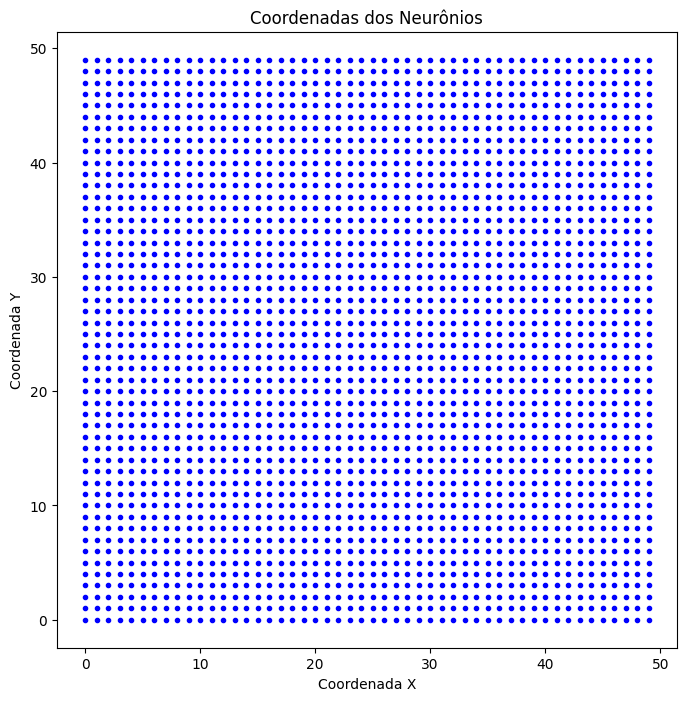

In [ ]:
# Calculando as coordenadas dos neurônios
neuron_positions = som.get_euclidean_coordinates()

# Coordenadas dos neurônios
neuron_positions_x = neuron_positions[0]
neuron_positions_y = neuron_positions[1]

# Plotar as coordenadas dos neurônios
plt.figure(figsize=(8, 8))
plt.scatter(neuron_positions_x, neuron_positions_y, c='blue', marker='.')
plt.title('Coordenadas dos Neurônios')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(False)
plt.show()


## Plotando neurônios ativados com as amostras apresentadas e mapa de calor

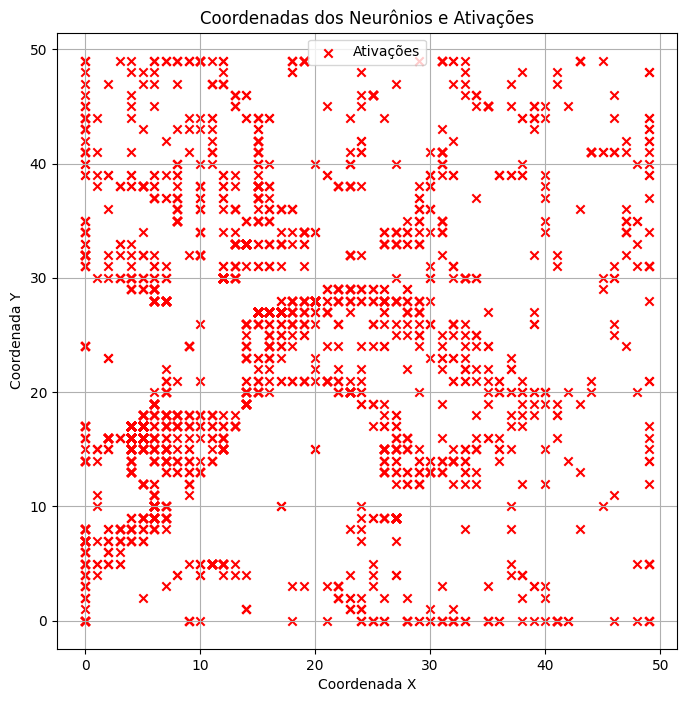

In [ ]:
# Obtendo as ativações para cada amostra
winner_coordinates = np.array([som.winner(x) for x in data_array])

# Plotar as coordenadas dos neurônios
plt.figure(figsize=(8, 8))
#plt.scatter(neuron_positions_x, neuron_positions_y, c='blue', marker='o', label='Neurônios')
plt.scatter(winner_coordinates[:, 1], winner_coordinates[:, 0], c='red', marker='x', label='Ativações')
plt.title('Coordenadas dos Neurônios e Ativações')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

## Plotando o mapa SOM com as interações entre as ativações

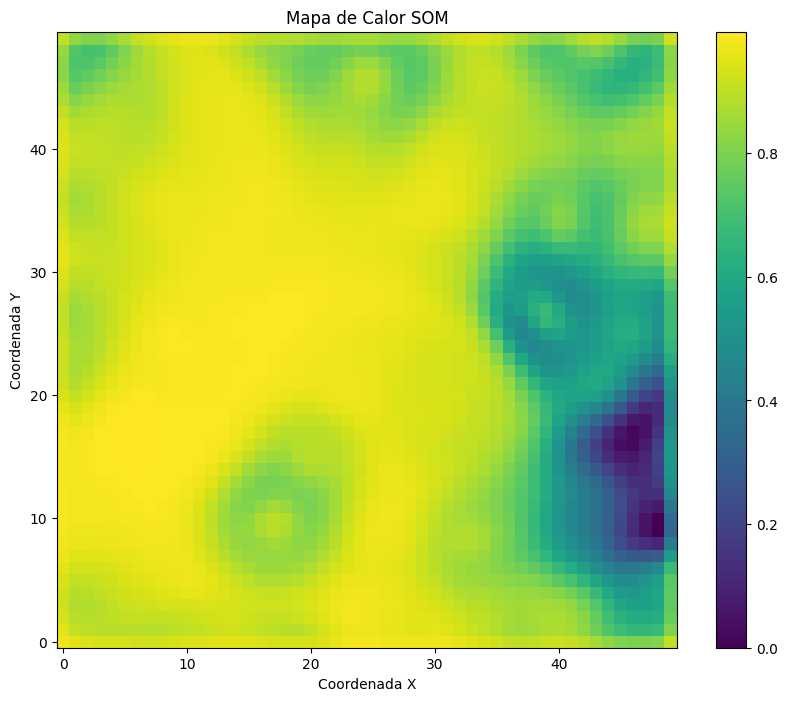

In [ ]:
# Criar uma matriz de distâncias
som.distance_map()
distance_map = 1 - som.distance_map()

# Plotar as coordenadas dos neurônios com mapa de calor
plt.figure(figsize=(10, 8))

# Plotar mapa de calor
plt.pcolor(neuron_positions_y, neuron_positions_x, distance_map, cmap='viridis', alpha=1)

plt.colorbar()
plt.title('Mapa de Calor SOM')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(False)
plt.show()

## Plotando o mapa SOM + neurônimos ativados

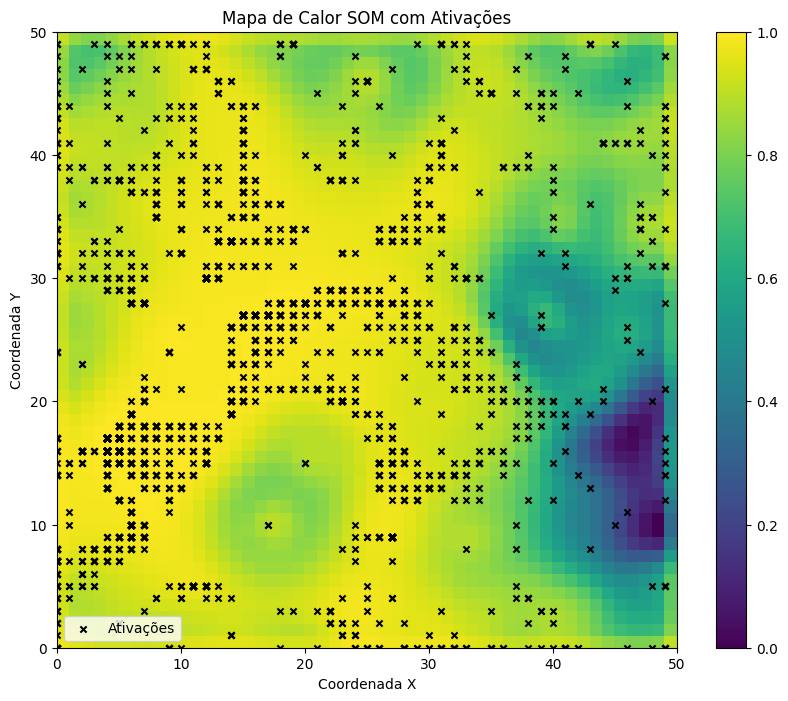

In [ ]:
# Obtendo as ativações para cada amostra
winner_coordinates = np.array([som.winner(x) for x in data_array])

# Criar uma matriz de distâncias
distance_map = 1 - som.distance_map()

# Plotar as coordenadas dos neurônios com mapa de calor
plt.figure(figsize=(10, 8))

# Plotar mapa de calor
plt.pcolor(distance_map, cmap='viridis', alpha=1)

# Adicionar marcadores para as ativações
plt.scatter(winner_coordinates[:, 1], winner_coordinates[:, 0], c='black', marker='x', s=20, label='Ativações')

plt.colorbar()
plt.title('Mapa de Calor SOM com Ativações')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(False)
plt.show()

## Mapa SOM + centróide com K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


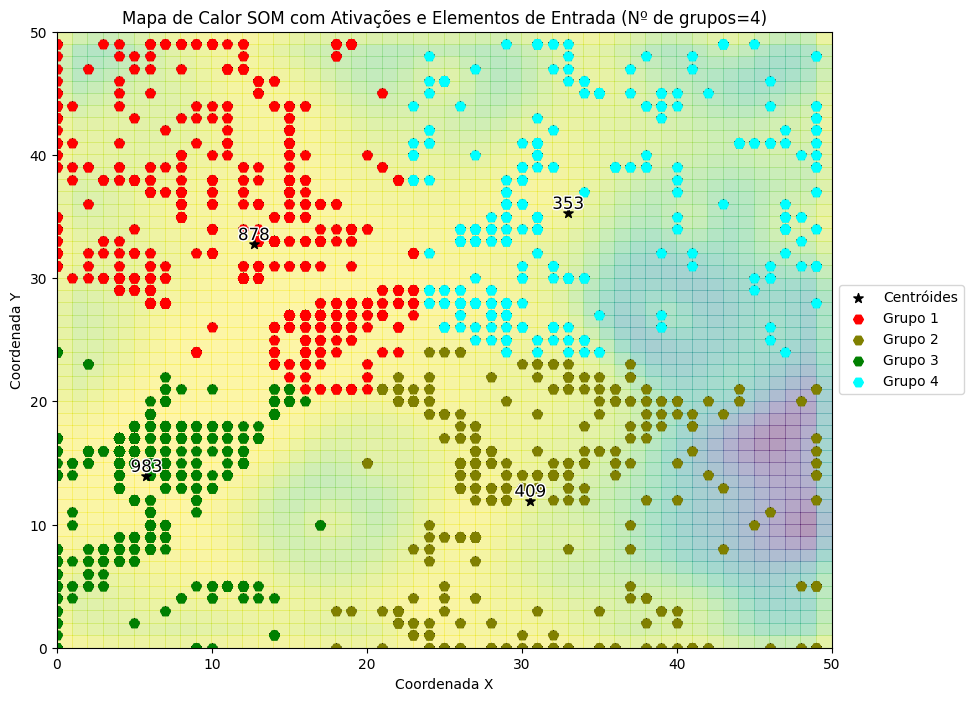

In [ ]:
# Definir o valor de K para os clusters
K = 4

# Obtendo as ativações para cada amostra
winner_coordinates = np.array([som.winner(x) for x in data_array])

# Criar uma matriz de distâncias
distance_map = 1 - som.distance_map()

# Definir uma paleta de cores com 15 cores diferentes
colors = ['red', 'olive', 'green', 'cyan', 'orange', 'black', 'magenta', 'navy', 'yellow', 'lime', 'brown', 'gray', 'blue', 'teal', 'navy', 'purple']

# Plotar as coordenadas dos neurônios com mapa de calor
plt.figure(figsize=(10, 8))

# Plotar mapa de calor
plt.pcolor(distance_map, cmap='viridis', alpha=0.4)

# Adicionar marcadores para as ativações
plt.scatter(winner_coordinates[:, 1], winner_coordinates[:, 0], c='black', marker='*', s=50, label='Centróides')

# Realizar o agrupamento K-Means para o valor de K escolhido
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(winner_coordinates)

# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_

# Cria labels de cada classe com relação aos dados inputados
data_labels = kmeans.labels_

# Calcular o número de elementos em cada classe
element_counts = [np.sum(data_labels == i) for i in range(K)]

# Plotar triângulos para os elementos de entrada com cores diferentes
for i in range(K):
    plt.scatter(winner_coordinates[data_labels == i][:, 1], winner_coordinates[data_labels == i][:, 0],
                c=colors[i], marker='H', s=50,label=f'Grupo {i + 1}')

plt.title(f'Mapa de Calor SOM com Ativações e Elementos de Entrada (Nº de grupos={K})')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Adicionar marcadores para os centróides e a quantidade de elementos sobre os centróides
for i in range(K):
    plt.scatter(centroids[i, 1], centroids[i, 0], c='black', marker='*', s=50)

    # Adicionar a quantidade de elementos sobre os centróides usando plt.text
    text = plt.text(centroids[i, 1], centroids[i, 0], f'{element_counts[i]}', ha='center', va='bottom', fontsize=12, color='black')

    # Aplicar uma borda ao texto
    text.set_path_effects([withStroke(linewidth=2, foreground='white')])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.show()


# Método Cotovelo

In [ ]:
def calculate_wcss(data):
  wcss = []
  for K in range(3, 15):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X=data)
    wcss.append(kmeans.inertia_)

  return wcss

In [ ]:
wcss = calculate_wcss(winner_coordinates)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

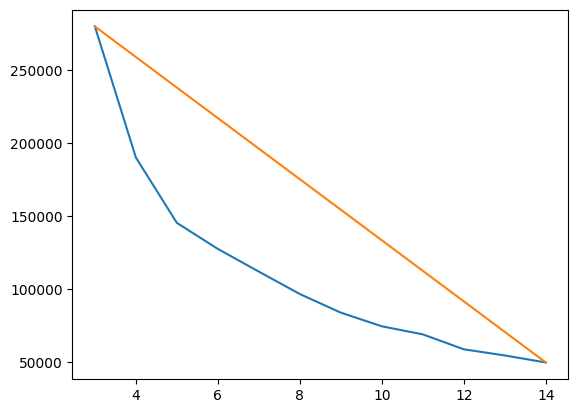

In [ ]:
x = range(3, 15)

plt.plot(x, wcss)
plt.plot([3, 14], [wcss[0], wcss[len(wcss) - 1]])


plt.show()

In [ ]:
def optimal_number_of_clusters(wcss):
  x1, y1 = 3, wcss[0]
  x2, y2 = 14, wcss[len(wcss) - 1]

  distances = []

  for i in range(len(wcss)):
    x0 = i + 1
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)

  return distances.index(max(distances)) + 2

In [ ]:
optimal_number_of_clusters(wcss)

4

# Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

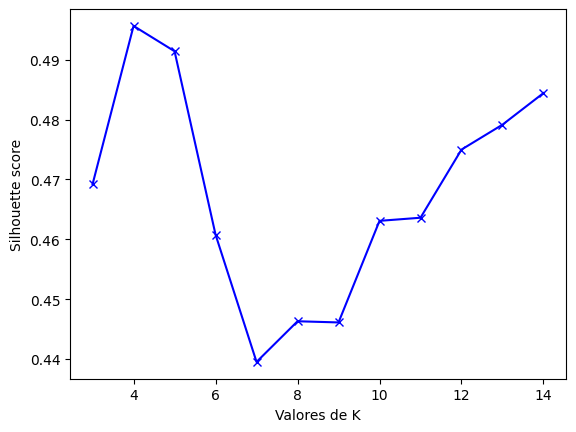

In [ ]:
range_n_clusters = range(3, 15)
silhouette_avg = []
for K in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=K)
  kmeans.fit(winner_coordinates)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(winner_coordinates, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Valores de K")
plt.ylabel("Silhouette score")
plt.show()

# ENTRADA DO USUÁRIO

### Lê um arquivo .csv com os dados de entrada

In [ ]:
data_entrada_usuario = pd.read_csv('/content/drive/Shareddrives/IA grupo 7/Dados_tratados.csv')

# usar dados de teste sem encoder
df_test = pd.read_csv('/content/drive/Shareddrives/IA grupo 7/dados_teste.csv')

In [ ]:
df_test.head()

,CODIGO CONTRIBUINTE,AJUIZAMENTO,COFIMP,DATA DE AJUIZAMENTO,DATA DE CANCELAMENTO,DATA DE ESGOTAMENTO PARCELAMENTO,DATA DE INSCRICAO,DATA DE LIQUIDACAO,DATA DE REGISTRO,DATA MUDANCA FASE CBA PDA,...,VALOR ARRECADADO ANO 2019,VALOR ARRECADADO ANO 2020,VALOR ARRECADADO ANO 2021,VALOR ARRECADADO ANO 2022,VALOR ARRECADADO ANO 2023,VALOR FATURADO ANO 2019,VALOR FATURADO ANO 2020,VALOR FATURADO ANO 2021,VALOR FATURADO ANO 2022,VALOR FATURADO ANO 2023
0,gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx...,0,0,-1844674407400,-1844674407400,-1844674407400,300957120000,321382080000,290848320000,292671360000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,gaaaaabkzwvnxjyfpatiyzumiw6ocijelowas-yeukwbzw...,0,0,-691752902775,-160198540925,-691752902775,102543840000,108924480000,96690240000,97355520000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,gaaaaabkzwvnpe5mhar8aakqx6smxryjptjmrhr7lpygjp...,0,0,-1983024987955,-1983024987955,-1983024987955,342857232000,345866544000,339123456000,340107984000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,gaaaaabkzwvnoi1lfqj7gugi6nkjwf222l1ty3acwdmipw...,0,0,-276701161110,-276701161110,-276701161110,44743104000,46246464000,42205536000,42545088000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,gaaaaabkzwvnksicpw-uov1wltd5kjouovh_7idjjjf4w4...,15,0,-115572073110,-1066018228440,-1383505805550,191543616000,-1066018228440,189310608000,190626048000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#
print(df_test.loc[0, 'CODIGO CONTRIBUINTE'])
print(df_test.loc[2209, 'CODIGO CONTRIBUINTE'])
print(df_test.loc[1435, 'CODIGO CONTRIBUINTE'])
print(df_test.loc[200, 'CODIGO CONTRIBUINTE'])
print(df_test.loc[456, 'CODIGO CONTRIBUINTE'])
print(df_test.loc[1233, 'CODIGO CONTRIBUINTE'])
print(df_test.loc[15, 'CODIGO CONTRIBUINTE'])
print(df_test.loc[876, 'CODIGO CONTRIBUINTE'])

gaaaaabkzwvmvqa2sjmhvhlits37ao3lkwtlsts_cctehx0gtiyizvjagqlf2uaq2uz80qy4dysi1ldbqng5bpzluhtl4bktnw==
gaaaaabkzxxrvzv8fcirsi5i9mhner4rf-jjnbhttnsthd4jqw3qs4vdun2zecxmfkkwjd0zoz5iagsp1zo4rbxiq6aoi8webq==
gaaaaabkzxc5dv97l9xe0ipjwy_uieks-g3i3_nf9soofq0p-ylfvcbsi5mtyrf9oqcvl-3amicozok0iaj7_srmvqybp8xmia==
gaaaaabkzwy8c__jw2l2dnozn9fph_dtt3azbqo3nuxbkcpflgiiaelwomezwqeezyyuha_jcz0w8mi7pmdppybo4iwfdke7_q==
gaaaaabkzw5ios04upn3viebunfs19ler-m3epyintwhefvwek8pa4cwsu2lbgejmof8r5bgitcyk1gndxggc6lp0h2y0f27ew==
gaaaaabkzxtpc17b0-sqkal5k1jsy2nf780f_tpyrvlwc-92cufa90fizcxat_4fkuvp3yawfown-0t7zos3kdonu2lgfww_9a==
gaaaaabkzwv7a6xdvdp-w6ikxqjeq9eplx0yufwxa3izkirwa7z6d0yuxniig2gi4ocu-4bzcfzp8zrozqzy5q8gweicc6vmhw==
gaaaaabkzxfwxe5hadgqekmzcdhkpumid8nd2we0typ4wvxpu-j-8u2gdrlt2kyl4z2wlrnkwvwo3hnlc7y2d8jyoj2l8edbmg==


In [ ]:
codigo_contribuinte = input("Digite o código do contribuinte: ")
idx_contribuinte = df_test[df_test['CODIGO CONTRIBUINTE'] == codigo_contribuinte].index

neuronio_ativado = som.winner(np.array(data_entrada_usuario.iloc[idx_contribuinte]))

Digite o código do contribuinte: gaaaaabkzwy8c__jw2l2dnozn9fph_dtt3azbqo3nuxbkcpflgiiaelwomezwqeezyyuha_jcz0w8mi7pmdppybo4iwfdke7_q==


In [ ]:
som.winner(np.array(data_entrada_usuario.iloc[idx_contribuinte]))

(34, 47)

### Determina em qual grupo está inserida a entrada

In [ ]:
# Lista de K clusters, onde cada cluster é uma tupla de coordenadas do centroide (cx, cy)
clusters = centroids  # Suponha que você já tenha sua lista de clusters


# Função para calcular a distância euclidiana entre dois pontos (x1, y1) e (x2, y2)
def distancia_euclidiana(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Inicialize a distância mínima com um valor grande
distancia_minima = float('inf')
indice_cluster_associado = None

# Itere pelos clusters para encontrar o cluster mais próximo
for indice, cluster in enumerate(clusters):
    cx, cy = cluster
    distancia = distancia_euclidiana(neuronio_ativado[0], neuronio_ativado[1], cx, cy)

    # Se a distância atual for menor que a distância mínima registrada, atualize o índice do cluster associado
    if distancia < distancia_minima:
        distancia_minima = distancia
        indice_cluster_associado = indice

# Agora 'indice_cluster_associado' contém o índice da linha da lista de clusters ao qual o neurônio ativado pertence
print(f"O neurônio ativado pertence ao grupo {indice_cluster_associado + 1}")


O neurônio ativado pertence ao grupo 4


### Plota no grafico com as informações treinadas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


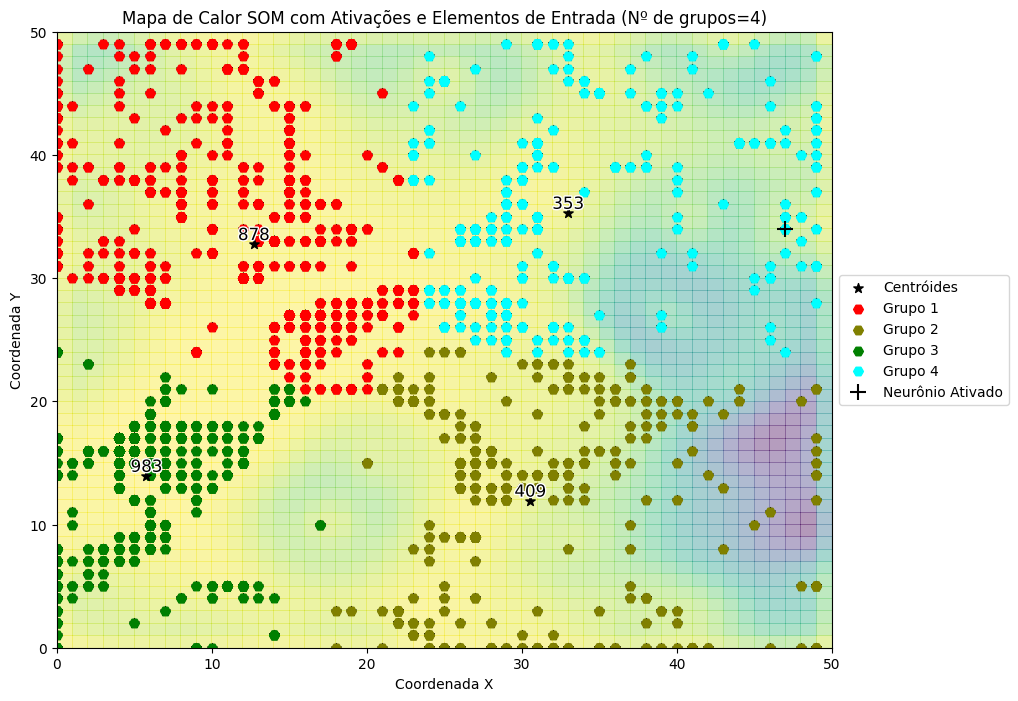

In [ ]:
# Suponha que você já tenha os seguintes dados: winner_coordinates, distance_map, centroids, colors, K, data_labels, element_counts
K = 4

# Plotar as coordenadas dos neurônios com mapa de calor
plt.figure(figsize=(10, 8))

# Plotar mapa de calor
plt.pcolor(distance_map, cmap='viridis', alpha=0.4)

# Adicionar marcadores para as ativações
plt.scatter(winner_coordinates[:, 1], winner_coordinates[:, 0], c='black', marker='*', s=50, label='Centróides')

# Realizar o agrupamento K-Means para o valor de K escolhido
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(winner_coordinates)

# Cria labels de cada classe com relação aos dados inputados
data_labels = kmeans.labels_

# Calcular o número de elementos em cada classe
element_counts = [np.sum(data_labels == i) for i in range(K)]

# Plotar triângulos para os elementos de entrada com cores diferentes
for i in range(K):
    plt.scatter(winner_coordinates[data_labels == i][:, 1], winner_coordinates[data_labels == i][:, 0],
                c=colors[i], marker='H', s=50,label=f'Grupo {i + 1}')

plt.title(f'Mapa de Calor SOM com Ativações e Elementos de Entrada (Nº de grupos={K})')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Adicionar marcadores para os centróides e a quantidade de elementos sobre os centróides
for i in range(K):
    plt.scatter(centroids[i, 1], centroids[i, 0], c='black', marker='*', s=50)

    # Adicionar a quantidade de elementos sobre os centróides usando plt.text
    text = plt.text(centroids[i, 1], centroids[i, 0], f'{element_counts[i]}', ha='center', va='bottom', fontsize=12, color='black')

    # Aplicar uma borda ao texto
    text.set_path_effects([withStroke(linewidth=2, foreground='white')])

# Plotar triângulo preto na posição do neurônio ativado
plt.scatter(neuronio_ativado[1], neuronio_ativado[0], c='black', marker='+', s=120, label='Neurônio Ativado')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.show()


# Criação da Planilha para a PGE

In [ ]:
np.where((winner_coordinates[:, 0] == 12) & (winner_coordinates[:, 1] == 9))

(array([], dtype=int64),)

In [ ]:
som.winner(np.array(data_entrada_usuario.iloc[23]))

In [ ]:
for i in [148,  319,  347,  933, 1074, 1131]:
  print(f'{df_test.loc[i, "CODIGO CONTRIBUINTE"]}')

# CÓDIGOS DE EXEMPLO TESTE E VISUALIZAÇÃO DE DADOS

*texto em itálico*## EXEMPLO BASE MAPA SOM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Suponha que você já tenha definido 'winner_coordinates' a partir do código anterior

# Criar uma matriz de dados a partir das coordenadas das ativações
data_array = np.array(winner_coordinates)

# Parâmetros do DBSCAN
eps = 0.5  # Raio de vizinhança
min_samples = 5  # Número mínimo de pontos em uma vizinhança

# Criar e ajustar o modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data_array)

# Obter rótulos de cluster atribuídos pelo DBSCAN
cluster_labels = dbscan.labels_

# Plotar as coordenadas das ativações coloridas por cluster
plt.figure(figsize=(8, 8))
plt.scatter(winner_coordinates[:, 1], winner_coordinates[:, 0], c=cluster_labels, marker='x', cmap='viridis')
plt.title('Coordenadas das Ativações (DBSCAN)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


NameError: ignored

In [ ]:
from minisom import MiniSom
import numpy as np
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5],
                   sep='\t+', engine='python')
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

## K-meas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar os dados
data_test = pd.read_csv('/content/drive/Shareddrives/IA grupo 7/Animais (Teste) 3.csv')
print(data_test)

# Corta as colunas indesejadas
data_selecionados = data_test.drop(['Animal'], axis=1)
data_selecionados = data_selecionados.drop('Cor predominante', axis=1, inplace=False)
#data_selecionados = data_selecionados.drop('Dentição', axis=1, inplace=False)
data_selecionados = data_selecionados.drop('Expectativa de vida', axis=1, inplace=False)

# Converter os dados para uma matriz numpy
data_array = data_selecionados.to_numpy()

# Definir o número de clusters (K)
num_clusters = 3

# Inicialização K-Means++ e treinamento
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42,max_iter = 100000)
kmeans.fit(data_array)

# Obter as coordenadas dos centróides
centroids = kmeans.cluster_centers_

# Obter as etiquetas de cluster para cada amostra
cluster_labels = kmeans.labels_

# Plotar as coordenadas dos centróides
plt.figure(figsize=(8, 8))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centróides')
plt.scatter(data_array[:, 0], data_array[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5, label='Amostras')
plt.title('Coordenadas dos Centróides e Amostras')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()


#-----------------

dados_predicao_input = pd.read_csv('/content/drive/Shareddrives/IA grupo 7/Animais (Teste) 4.csv')
dados_predicao = dados_predicao_input.drop('Animal', axis=1, inplace=False)
dados_predicao = dados_predicao.drop('Cor predominante', axis=1, inplace=False)
#dados_predicao = dados_predicao.drop('Dentição', axis=1, inplace=False)
dados_predicao = dados_predicao.drop('Expectativa de vida', axis=1, inplace=False)

predicao = kmeans.predict(dados_predicao)

dados_predicao_input['Predicao'] = predicao
#print(dados_predicao['Animal'],dados_predicao['Predicao'])

# Suponha que 'tabela' seja o seu DataFrame
coluna_v1 = dados_predicao_input['Animal']
coluna_v2 = dados_predicao_input['Predicao']

# Concatenar as colunas lado a lado
colunas_concatenadas = pd.concat([coluna_v1, coluna_v2], axis=1)

print(colunas_concatenadas)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/IA grupo 7/Animais (Teste) 3.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Coluna CPF/CNPJ

In [ ]:
# Verificar se existem itens repetidos na coluna específica
if data['CPF/CNPJ'].duplicated().any():
    print("Existem itens repetidos na coluna.")

    # Obter a contagem de ocorrências de cada item repetido
    contagem_itens_repetidos = data['CPF/CNPJ'].value_counts()

    # Criar uma nova tabela com duas colunas: 'Nome' e 'quantidade'
    tabela_final = pd.DataFrame({'Nome': contagem_itens_repetidos.index, 'quantidade': contagem_itens_repetidos.values, 'grupo': ''})

    print("Tabela com duas colunas (Nome) e (quantidade):")
    print(tabela_final)
else:
    print("Não existem itens repetidos na coluna.")

# Supondo que 'data' é o seu DataFrame e 'coluna_especifica' é a coluna que você deseja analisar

# Contar quantas linhas têm o valor "1" na coluna específica
#contador_valor_1 = data['CPF/CNPJ'].value_counts().get(25950, "Não encontrado")
#contagem_itens_repetidos.get(25950,"Não encontrado")
#contagem_itens_repetidos.to_csv('/content/drive/My Drive/ContagemRepetidos.csv', index=False)

# Define a função de agrupamento
def agrupar_valor(valor):
    if valor > 5000:
        return "A > 5000"
    elif valor > 2500:
        return "B > 1000"
    elif valor > 500:
        return "C > 500"
    elif valor > 100:
        return "D > 100"
    elif valor > 50:
        return "E > 50"
    elif valor > 25:
        return "F > 25"
    elif valor > 10:
        return "G > 10"
    elif valor > 1:
        return "H > 1"
    else:
        return "I = 1"

# Aplica a função de agrupamento na coluna 'Valor' e cria uma nova coluna chamada 'Grupo'
tabela_final['grupo'] = tabela_final['quantidade'].apply(agrupar_valor)


# Calcular a contagem de ocorrências de cada grupo
contagem_grupos = tabela_final['grupo'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_grupos, labels=contagem_grupos.index, autopct='%1.1f%%')
plt.title('Gráfico de Pizza - Proporção dos Grupos')
plt.show()

# Calcular a contagem de ocorrências de cada grupo
contagem_grupos = tabela_final['grupo'].value_counts()

# Ordenar os grupos alfabeticamente
contagem_grupos = contagem_grupos.sort_index()

plt.figure(figsize=(8, 6))  # Tamanho do gráfico

# Plotar o gráfico de barra horizontal
bars = plt.barh(contagem_grupos.index, contagem_grupos)

# Adicionar os valores ao lado de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center')

# Rotacionar os labels para facilitar a leitura
plt.xticks(rotation=45)

# Adicionar título e labels dos eixos
plt.title('Gráfico de Barra Horizontal - Proporção dos Grupos')
plt.xlabel('Quantidade')
plt.ylabel('Grupo')

plt.show()

## COLUNA CODIGO CONTRIBUINTE

In [ ]:
# Verificar se existem itens repetidos na coluna específica
if data['CODIGO CONTRIBUINTE'].duplicated().any():
    print("Existem itens repetidos na coluna.")

    # Obter a contagem de ocorrências de cada item repetido
    contagem_itens_repetidos = data['CODIGO CONTRIBUINTE'].value_counts()

    # Criar uma nova tabela com duas colunas: 'Nome' e 'quantidade'
    tabela_final = pd.DataFrame({'Nome': contagem_itens_repetidos.index, 'quantidade': contagem_itens_repetidos.values, 'grupo': ''})

    print("Tabela com duas colunas (Nome) e (quantidade):")
    print(tabela_final)
else:
    print("Não existem itens repetidos na coluna.")

# Supondo que 'data' é o seu DataFrame e 'coluna_especifica' é a coluna que você deseja analisar

# Contar quantas linhas têm o valor "1" na coluna específica
#contador_valor_1 = data['CPF/CNPJ'].value_counts().get(25950, "Não encontrado")
#contagem_itens_repetidos.get(25950,"Não encontrado")
#contagem_itens_repetidos.to_csv('/content/drive/My Drive/ContagemRepetidos.csv', index=False)

# Define a função de agrupamento
def agrupar_valor(valor):
    if valor > 5000:
        return "A > 5000"
    elif valor > 2500:
        return "B > 1000"
    elif valor > 500:
        return "C > 500"
    elif valor > 100:
        return "D > 100"
    elif valor > 50:
        return "E > 50"
    elif valor > 25:
        return "F > 25"
    elif valor > 10:
        return "G > 10"
    elif valor > 1:
        return "H > 1"
    else:
        return "I = 1"

# Aplica a função de agrupamento na coluna 'Valor' e cria uma nova coluna chamada 'Grupo'
tabela_final['grupo'] = tabela_final['quantidade'].apply(agrupar_valor)


# Calcular a contagem de ocorrências de cada grupo
contagem_grupos = tabela_final['grupo'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_grupos, labels=contagem_grupos.index, autopct='%1.1f%%')
plt.title('Gráfico de Pizza - Proporção dos Grupos')
plt.show()

# Calcular a contagem de ocorrências de cada grupo
contagem_grupos = tabela_final['grupo'].value_counts()

# Ordenar os grupos alfabeticamente
contagem_grupos = contagem_grupos.sort_index()

plt.figure(figsize=(8, 6))  # Tamanho do gráfico

# Plotar o gráfico de barra horizontal
bars = plt.barh(contagem_grupos.index, contagem_grupos)

# Adicionar os valores ao lado de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center')

# Rotacionar os labels para facilitar a leitura
plt.xticks(rotation=45)

# Adicionar título e labels dos eixos
plt.title('Gráfico de Barra Horizontal - Proporção dos Grupos')
plt.xlabel('Quantidade')
plt.ylabel('Grupo')

plt.show()

## ANO PERIODO FISCAL EMPRESA

In [ ]:

# Lista das colunas que você deseja manter
columns_to_keep = ['ANO PERIODO FISCAL EMPRESA', 'VALOR ARRECADADO ANO', 'VALOR FATURADO ANO']

# Criar um novo DataFrame com as colunas selecionadas
data_selecionados = data_base[columns_to_keep]

# Função para converter valores para inteiros tratando o separador decimal
def convert_to_int(value):
    try:
        # Extrair a parte inteira antes da vírgula
        value = value.split(',')[0]
        return int(value)
    except:
        return None  # Tratar valores não numéricos

# Converter as colunas para o tipo inteiro usando a função de conversão
data_selecionados['VALOR ARRECADADO ANO'] = data_selecionados['VALOR ARRECADADO ANO'].apply(convert_to_int)
data_selecionados['VALOR FATURADO ANO'] = data_selecionados['VALOR FATURADO ANO'].apply(convert_to_int)


# Suponha que 'data' seja o seu DataFrame pré-processado
data_array = data_selecionados.to_numpy()  # Converta o DataFrame para uma matriz numpy

# Defina os parâmetros do SOM
som_size = (10, 10)  # Tamanho do mapa
learning_rate = 0.5
sigma = 1.0

# Crie e treine o SOM
som = MiniSom(som_size[0], som_size[1], data_array.shape[1], sigma=sigma, learning_rate=learning_rate)
som.train(data_array, 1000)  # Treine por 1000 iterações

# Agora você pode visualizar e analisar os resultados

In [ ]:
# Remover quaisquer NaN que possam ter ficado após as correções substituindo por '-'
data['ANO PERIODO FISCAL EMPRESA'] = data['ANO PERIODO FISCAL EMPRESA'].fillna('-')

# Pré-processamento para remover espaços extras e converter para letras minúsculas
data['ANO PERIODO FISCAL EMPRESA'] = data['ANO PERIODO FISCAL EMPRESA'].str.strip()
data['ANO PERIODO FISCAL EMPRESA'] = data['ANO PERIODO FISCAL EMPRESA'].str.lower()

# Contar a frequência dos anos
frequencia_anos = data['ANO PERIODO FISCAL EMPRESA'].value_counts()

# Gerar o gráfico de pizza com base na contagem de frequência
plt.figure(figsize=(6, 6))  # Definindo o tamanho do gráfico (opcional)

# Plotar o gráfico de pizza com os anos e suas respectivas frequências
frequencia_anos.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gráfico de Pizza')  # Título do gráfico (opcional)
plt.axis('equal')  # Para garantir que o gráfico seja exibido como uma pizza e não uma elipse (opcional)
plt.show()  # Exibir o gráfico

print("A contagem dos elementos é: \n", frequencia_anos)

tamanho_lista = len(data['ANO PERIODO FISCAL EMPRESA'])

# Imprimindo o tamanho da lista
print("O tamanho da lista é:", tamanho_lista)


## Amostra dos dados

In [ ]:
# Pegar apenas uma amostra dos dados
pd.set_option('display.max_rows', None)
df_amostra = data.sample(n=100, random_state=42)
df_amostra.to_csv('/content/drive/My Drive/Dadosnovos.csv', index=False)

## SEGMENTO CONTRIBUINTE

In [ ]:
# Remover quaisquer NaN que possam ter ficado após as correções
data['SEGMENTO CONTRIBUINTE'] = data['SEGMENTO CONTRIBUINTE'].fillna('-')

# Pré-processamento para remover espaços extras e converter para letras minúsculas
data['SEGMENTO CONTRIBUINTE'] = data['SEGMENTO CONTRIBUINTE'].str.strip()
data['SEGMENTO CONTRIBUINTE'] = data['SEGMENTO CONTRIBUINTE'].str.lower()

# Contar a frequência dos anos
frequencia_anos = data['SEGMENTO CONTRIBUINTE'].value_counts()

# Gerar o gráfico de pizza com base na contagem de frequência
plt.figure(figsize=(6, 6))  # Definindo o tamanho do gráfico (opcional)

# Plotar o gráfico de pizza com os anos e suas respectivas frequências
frequencia_anos.plot(kind='pie', autopct='%1.1f%%')

plt.title('Gráfico de Pizza')  # Título do gráfico (opcional)
plt.axis('equal')  # Para garantir que o gráfico seja exibido como uma pizza e não uma elipse (opcional)
plt.show()  # Exibir o gráfico

## SITUACAO PROCESSO

In [ ]:
# Remover quaisquer NaN que possam ter ficado após as correções
data['SITUACAO PROCESSO'] = data['SITUACAO PROCESSO'].fillna('-')

# Pré-processamento para remover espaços extras e converter para letras minúsculas
data['SITUACAO PROCESSO'] = data['SITUACAO PROCESSO'].str.strip()
data['SITUACAO PROCESSO'] = data['SITUACAO PROCESSO'].str.lower()

# Contar a frequência dos anos
situacao = data['SITUACAO PROCESSO'].value_counts()

# Gerar o gráfico de pizza com base na contagem de frequência
plt.figure(figsize=(6, 6))  # Definindo o tamanho do gráfico (opcional)

# Plotar o gráfico de pizza com os anos e suas respectivas frequências
situacao.plot(kind='pie', autopct='%1.1f%%')

plt.title('Gráfico de Pizza')  # Título do gráfico (opcional)
plt.axis('equal')  # Para garantir que o gráfico seja exibido como uma pizza e não uma elipse (opcional)
plt.show()  # Exibir o gráfico

print("A contagem dos elementos é:\n")
print(situacao, end="")
lista_situacao = len(data['SITUACAO PROCESSO'])
#lista_situacao = sorted(lista_situacao, reverse=True)

# Imprimindo o tamanho da lista
print("O tamanho da lista é:", lista_situacao, end="")

## SITUACAO DIVIDA ATIVA

In [ ]:
# Contar a frequência dos anos
situacao_div_ativa = data['SITUACAO DIVIDA ATIVA'].value_counts()

# Gerar o gráfico de pizza com base na contagem de frequência
plt.figure(figsize=(6, 6))  # Definindo o tamanho do gráfico (opcional)

# Plotar o gráfico de pizza com os anos e suas respectivas frequências
situacao_div_ativa.plot(kind='pie', autopct='%1.1f%%')

plt.title('Gráfico de Pizza')  # Título do gráfico (opcional)
plt.axis('equal')  # Para garantir que o gráfico seja exibido como uma pizza e não uma elipse (opcional)
plt.show()  # Exibir o gráfico